<a href="https://colab.research.google.com/github/JyresaMae/Digital-Signal-Processing/blob/main/Filters(high_pass%2C_low_pass%2C_%26_band_stop_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from thinkdsp import read_wave

wave = read_wave('170255__dublie__trumpet.wav')
wave.normalize()
wave.make_audio()

In [ ]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

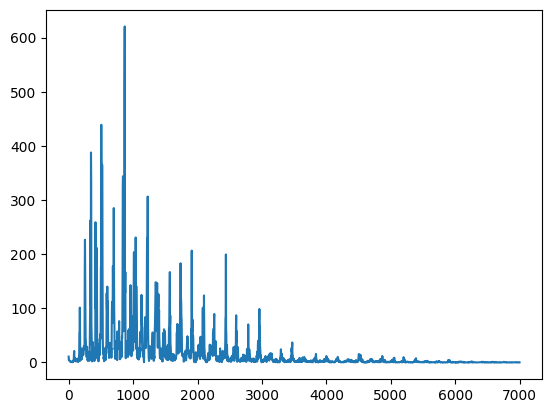

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

Next we can filter out the high frequencies using the filters which are `low_pass`,`high_pass`, & `band_stop`

Spectrum provides `low_pass`, which applies a low pass filter; that is, it attenuates all frequency components above a cutoff frequency with the corresponding sound from it:

In [ ]:
spectrum.low_pass(3000)
spectrum.make_wave().make_audio()

In the following interaction, choose an area and use filters. With a 3400 Hz cutoff, the sample will have a lovely piano melody.

In [ ]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')

    audio = spectrum.make_wave().make_audio()
    display(audio)

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

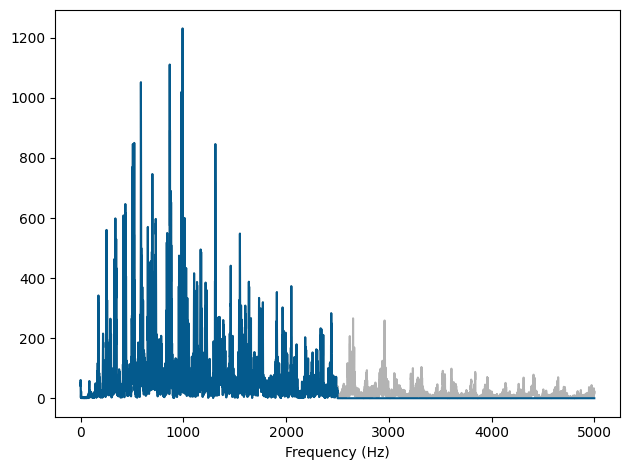

In [ ]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave),
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

`high_pass` operates as a high-pass filter, attenuating components below the selected cutoff frequency.

In [ ]:
spectrum.high_pass(cutoff=3000, factor=0.01)
spectrum.make_wave().make_audio()

In the following interaction, choose an area and use filters. With a 3400 Hz cutoff, the sample will have a high pitch sound.

In [ ]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.high_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')

    audio = spectrum.make_wave().make_audio()
    display(audio)

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

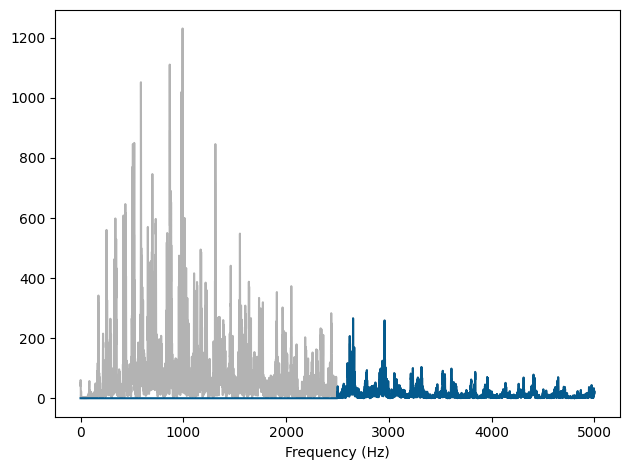

In [ ]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave),
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

`band_stop` attenuates components in the band of frequencies between two cutoffs which are low_cutoff and high_cutoff.

In [ ]:
spectrum.band_stop(low_cutoff=60, high_cutoff=3000, factor=0.01)
spectrum.make_wave().make_audio()

The following interaction allows you to select a segment and apply different filters. If you set the cutoff to 3400 Hz, you can simulate what the sample would sound like over an old (not digital) phone line.

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

<function __main__.interactive_filter_wave(wave, start, duration, low_cutoff, high_cutoff)>

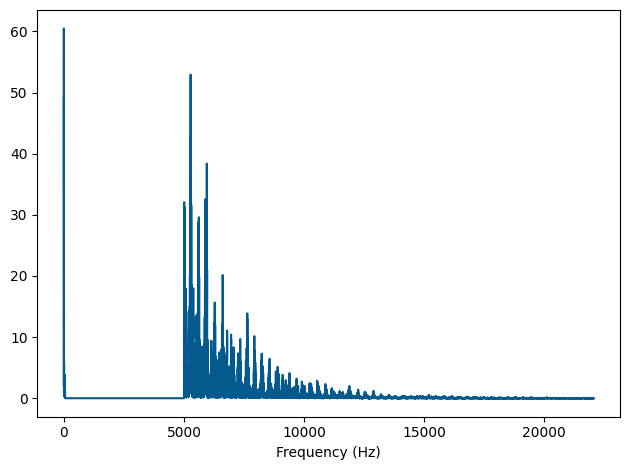

In [ ]:
from thinkdsp import decorate, read_wave
from thinkdsp import Spectrum
from IPython.display import display
from ipywidgets import interact, fixed, FloatSlider

def band_stop_filter(spectrum, low_cutoff, high_cutoff):
    spectrum.hs[(spectrum.fs >= low_cutoff) & (spectrum.fs <= high_cutoff)] = 0

def interactive_filter_wave(wave, start, duration, low_cutoff, high_cutoff):
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    # Apply the band-stop filter
    band_stop_filter(spectrum, low_cutoff, high_cutoff)

    # Plot the modified spectrum
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')

    audio = spectrum.make_wave().make_audio()
    display(audio)

# Load a wave file (you can replace 'example_wave.wav' with your own wave file)
wave = read_wave('170255__dublie__trumpet.wav')

# Use interact to create sliders for the parameters
interact(
    interactive_filter_wave,
    wave=fixed(wave),
    start=(0, 5, 0.1),
    duration=(0, 5, 0.1),
    low_cutoff=FloatSlider(min=50, max=5000, value=0),
    high_cutoff=FloatSlider(min=50, max=5000, value=5000)
)
